# CASE STUDY – Data Scientist ( Source) 

# 1- Import Key Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, '../lib')  # noqa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pdb
from sklearn.metrics import *

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import itertools
import csv

# for ML models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
# for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# 2- Laoding and preparing Data

In [2]:
# Load Dataset
df = pd.read_csv('hotels.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,car_park,club_club_hotel,designer_hotel,attraction_hotel,luxury_hotel,beach_front_hotel,convention_hotel,spa_hotel,country_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
0,11511119,31497,Hotel,Xi Hu,2799,114.171005,22.306065,NaN,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,11577919,14121,Hotel,Colors Urban Thessaloniki,586,22.939219,40.634808,5.0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2,11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,4.876711,52.427399,5.0,1,2,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
3,11814291,14121,Hotel,Elia City,611,22.938929,40.634880,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,11938295,31497,Home / Apartment,Le Petit Rosedale Hong Kong,2870,114.189240,22.279209,3.0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [3]:
df.shape

(400, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            400 non-null    int64  
 1   city_id             400 non-null    int64  
 2   hotel_type          400 non-null    object 
 3   basename            400 non-null    object 
 4   distance_to_center  400 non-null    int64  
 5   longitude           400 non-null    float64
 6   latitude            400 non-null    float64
 7   overall_rating      359 non-null    float64
 8   impression_level    400 non-null    int64  
 9   interaction_level   400 non-null    int64  
 10  car_park            292 non-null    float64
 11  club_club_hotel     9 non-null      float64
 12  designer_hotel      54 non-null     float64
 13  attraction_hotel    20 non-null     float64
 14  luxury_hotel        53 non-null     float64
 15  beach_front_hotel   27 non-null     float64
 16  conventi

### checking missing values

In [5]:
df.isnull().sum()

hotel_id                0
city_id                 0
hotel_type              0
basename                0
distance_to_center      0
longitude               0
latitude                0
overall_rating         41
impression_level        0
interaction_level       0
car_park              108
club_club_hotel       391
designer_hotel        346
attraction_hotel      380
luxury_hotel          347
beach_front_hotel     373
convention_hotel      305
spa_hotel             363
country_hotel         390
airport_hotel         355
senior_hotel          397
eco_friendly_hotel    361
party_people          327
business_people       172
honeymooners          314
singles               295
large_groups          261
family_hotel          243
gay_friendly          318
wifi_lobby             58
wifi_room              58
dtype: int64

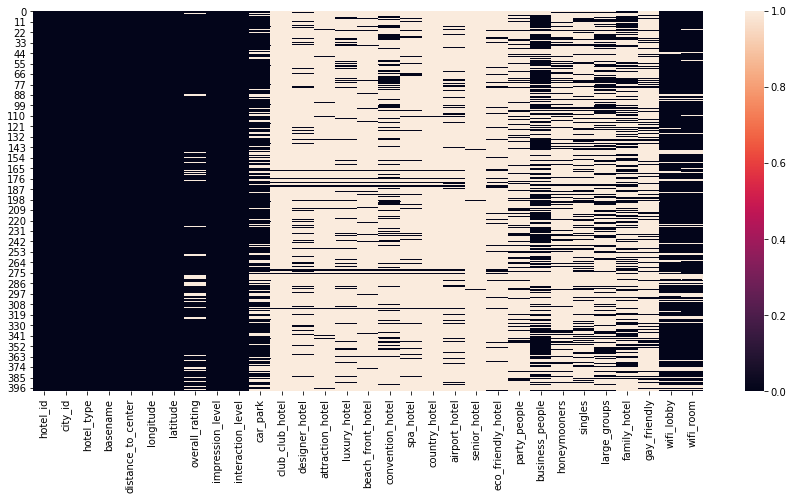

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull())

In [7]:
missing_var_per = df.isnull().sum()/df.shape[0] * 100
missing_var_per

hotel_id               0.00
city_id                0.00
hotel_type             0.00
basename               0.00
distance_to_center     0.00
longitude              0.00
latitude               0.00
overall_rating        10.25
impression_level       0.00
interaction_level      0.00
car_park              27.00
club_club_hotel       97.75
designer_hotel        86.50
attraction_hotel      95.00
luxury_hotel          86.75
beach_front_hotel     93.25
convention_hotel      76.25
spa_hotel             90.75
country_hotel         97.50
airport_hotel         88.75
senior_hotel          99.25
eco_friendly_hotel    90.25
party_people          81.75
business_people       43.00
honeymooners          78.50
singles               73.75
large_groups          65.25
family_hotel          60.75
gay_friendly          79.50
wifi_lobby            14.50
wifi_room             14.50
dtype: float64

### Checking categorical variable

In [8]:
df.wifi_room.value_counts()

1.0    338
0.0      4
Name: wifi_room, dtype: int64

### Treating missing value issue

In [9]:
# Return the columns whose column's missing value percentage is greater than 25%
return_miss_per_columns = missing_var_per[missing_var_per>25].keys()
return_miss_per_columns

Index(['car_park', 'club_club_hotel', 'designer_hotel', 'attraction_hotel',
       'luxury_hotel', 'beach_front_hotel', 'convention_hotel', 'spa_hotel',
       'country_hotel', 'airport_hotel', 'senior_hotel', 'eco_friendly_hotel',
       'party_people', 'business_people', 'honeymooners', 'singles',
       'large_groups', 'family_hotel', 'gay_friendly'],
      dtype='object')

In [10]:
# Delete the column whose column's missing value percentage is greater than 25% 
delete_miss_per_columns = df.drop(columns=return_miss_per_columns)
delete_miss_per_columns.shape

(400, 12)

In [11]:
# Return the 'Int' and 'Float' value columns

#df2_drop_clm.select_dtypes(include=['int64','float64']).columns
df3_num = delete_miss_per_columns.select_dtypes(include=['int64','float64', 'object'])
df3_num.shape
df3_num.head()

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,wifi_lobby,wifi_room
0,11511119,31497,Hotel,Xi Hu,2799,114.171005,22.306065,NaN,1,1,1.0,1.0
1,11577919,14121,Hotel,Colors Urban Thessaloniki,586,22.939219,40.634808,5.0,1,1,1.0,1.0
2,11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,4.876711,52.427399,5.0,1,2,1.0,1.0
3,11814291,14121,Hotel,Elia City,611,22.938929,40.634880,NaN,1,1,1.0,1.0
4,11938295,31497,Home / Apartment,Le Petit Rosedale Hong Kong,2870,114.189240,22.279209,3.0,1,1,1.0,1.0


In [12]:
df3_num.shape

(400, 12)

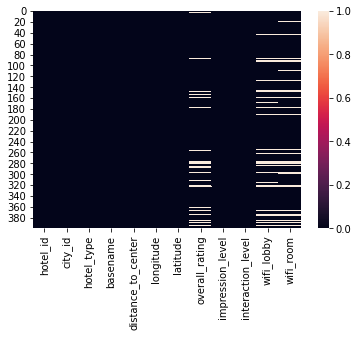

In [13]:
sns.heatmap(delete_miss_per_columns.isnull())

In [14]:
# Return the null values columns
df3_num[df3_num.isnull().any(axis=1)].head()

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,wifi_lobby,wifi_room
0,11511119,31497,Hotel,Xi Hu,2799,114.171005,22.306065,NaN,1,1,1.0,1.0
3,11814291,14121,Hotel,Elia City,611,22.938929,40.634880,NaN,1,1,1.0,1.0
20,7170159,14257,Hotel,Hyatt Regency Los Angeles International Airport,17374,-118.395111,33.946163,2.0,1,1,1.0,NaN
44,11940539,14257,Home / Apartment,Boutique Hollywood,6520,-118.301659,34.096268,3.0,1,1,NaN,NaN
45,211627,27561,Hotel,Rokin,161,4.892997,52.370232,3.0,1,1,NaN,1.0


In [15]:
df3_num.isnull().sum()

hotel_id               0
city_id                0
hotel_type             0
basename               0
distance_to_center     0
longitude              0
latitude               0
overall_rating        41
impression_level       0
interaction_level      0
wifi_lobby            58
wifi_room             58
dtype: int64

In [16]:
df3_num.isnull().sum()/df.shape[0]*100

hotel_id               0.00
city_id                0.00
hotel_type             0.00
basename               0.00
distance_to_center     0.00
longitude              0.00
latitude               0.00
overall_rating        10.25
impression_level       0.00
interaction_level      0.00
wifi_lobby            14.50
wifi_room             14.50
dtype: float64

In [17]:
missing_num_var =[var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['overall_rating', 'wifi_lobby', 'wifi_room']

In [18]:
# Here question raise how we can fill these missing values?
# Q1- who we can fill these missing values mean or median?
# Answer- First we can see the data distribution. 
#            1- If our distribution is symetric means (Normal/Bell Shape Distribution), So we can use mean.
#            2- If our distribution is asymetric means (Left or Right Skewed), So we can use median.

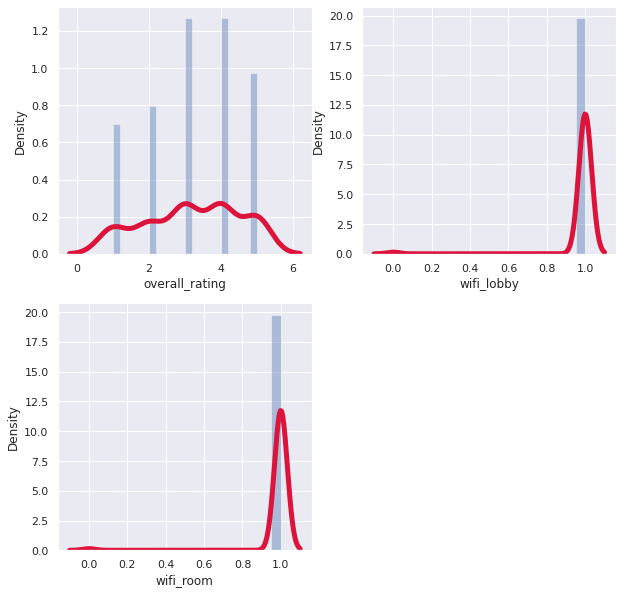

In [19]:
# Checking the distribution of missing values columns
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var],bins=20,kde_kws={'linewidth':5, 'color':'#DC143C'})

In [20]:
# We can fill missing values by using Mean because our distribution is skewed
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum().sum()

0

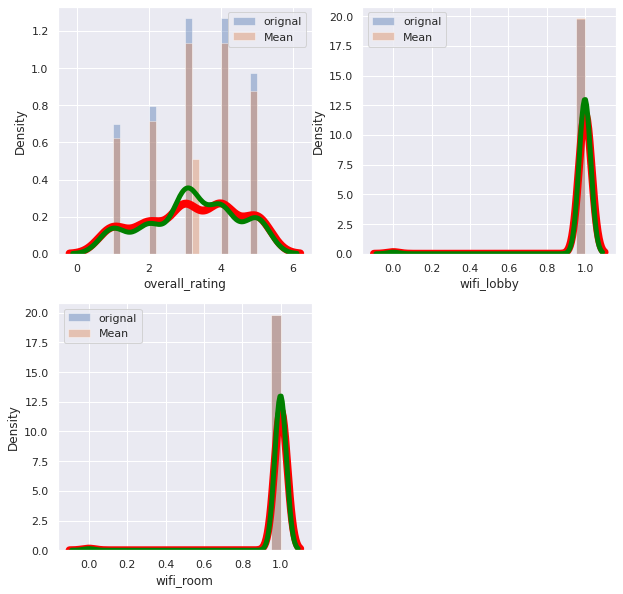

In [21]:
# comparing the graph of orignal dataset distribution and clean dataset distribution
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="orignal",)
    sns.distplot(df4_num_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'}, label="Mean",)
    plt.legend()

In [22]:
# We can fill missing values by using Median because our distribution is skewed
df5_num_median = df3_num.fillna(df3_num.median())
df5_num_median.isnull().sum().sum()

0

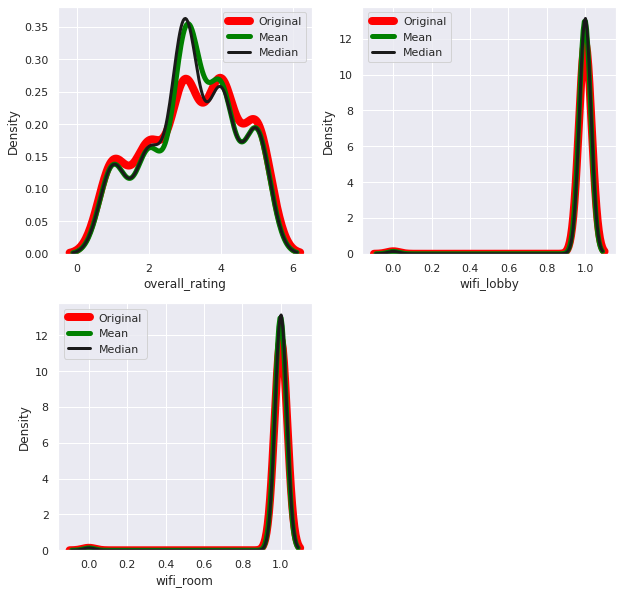

In [23]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df4_num_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df5_num_median[var], bins=20,hist=False, kde_kws={'linewidth':3, 'color':'k'},label="Median",)
    plt.legend()

In [24]:
# for i, var in enumerate(missing_num_var):
#     plt.figure(figsize=(10,10))
#     plt.subplot(3,1,1)
#     sns.boxplot(df[var])
#     plt.subplot(3,1,2)
#     sns.boxplot(df4_num_mean[var])
#     plt.subplot(3,1,3)
#     sns.boxplot(df5_num_median[var])

In [25]:
df_concat = pd.concat([df3_num[missing_num_var],df4_num_mean[missing_num_var],df5_num_median[missing_num_var]], axis=1)

In [26]:
df_concat[df_concat.isnull().any(axis=1)].head()

,overall_rating,wifi_lobby,wifi_room,overall_rating,wifi_lobby,wifi_room,overall_rating,wifi_lobby,wifi_room
0,NaN,1.0,1.0,3.206128,1.000000,1.000000,3.0,1.0,1.0
3,NaN,1.0,1.0,3.206128,1.000000,1.000000,3.0,1.0,1.0
20,2.0,1.0,NaN,2.000000,1.000000,0.988304,2.0,1.0,1.0
44,3.0,NaN,NaN,3.000000,0.988304,0.988304,3.0,1.0,1.0
45,3.0,NaN,1.0,3.000000,0.988304,1.000000,3.0,1.0,1.0


In [27]:
df3_num.describe()

,hotel_id,city_id,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,wifi_lobby,wifi_room
count,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,359.000000,400.000000,400.000000,342.000000,342.000000
mean,4.244724e+06,21859.000000,1.321433e+04,5.996754,37.322597,3.206128,1.930000,1.692500,0.988304,0.988304
std,5.293982e+06,7805.128062,1.526345e+05,82.822482,10.893116,1.308275,1.764336,1.361093,0.107671,0.107671
min,1.585300e+04,14121.000000,0.000000e+00,-118.468529,22.199528,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.083580e+05,14223.000000,9.305000e+02,-18.350004,30.073911,2.000000,1.000000,1.000000,1.000000,1.000000
50%,1.934913e+06,20909.000000,2.337000e+03,13.834069,36.210762,3.000000,1.000000,1.000000,1.000000,1.000000
75%,7.009567e+06,28545.000000,6.200750e+03,46.274646,43.562843,4.000000,2.000000,2.000000,1.000000,1.000000
max,1.963608e+07,31497.000000,3.043545e+06,114.262268,52.427399,5.000000,10.000000,10.000000,1.000000,1.000000


In [28]:
df5_num_median.head()

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,wifi_lobby,wifi_room
0,11511119,31497,Hotel,Xi Hu,2799,114.171005,22.306065,3.0,1,1,1.0,1.0
1,11577919,14121,Hotel,Colors Urban Thessaloniki,586,22.939219,40.634808,5.0,1,1,1.0,1.0
2,11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,4.876711,52.427399,5.0,1,2,1.0,1.0
3,11814291,14121,Hotel,Elia City,611,22.938929,40.634880,3.0,1,1,1.0,1.0
4,11938295,31497,Home / Apartment,Le Petit Rosedale Hong Kong,2870,114.189240,22.279209,3.0,1,1,1.0,1.0


In [29]:
 df5_num_median.to_csv('Hotels_Clean_Data.csv')

In [30]:
df5_num_median['ratings_average'] = df5_num_median.groupby(['hotel_id'])['overall_rating'].mean()
df5_num_median['ratings_count'] = df5_num_median.groupby(['hotel_id'])['overall_rating'].count()

In [31]:
df5_num_median[[ 'hotel_type', 'basename', 'ratings_average', 'ratings_count']].head()

,hotel_type,basename,ratings_average,ratings_count
0,Hotel,Xi Hu,NaN,NaN
1,Hotel,Colors Urban Thessaloniki,NaN,NaN
2,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,NaN,NaN
3,Hotel,Elia City,NaN,NaN
4,Home / Apartment,Le Petit Rosedale Hong Kong,NaN,NaN


In [32]:
df5_num_median['overall_rating'].value_counts()

3.0    132
4.0     91
5.0     70
2.0     57
1.0     50
Name: overall_rating, dtype: int64

In [33]:
# the lower the price, the more likely I am going to buy
df5_num_median['rating_probability'] = df5_num_median['overall_rating'] * 1

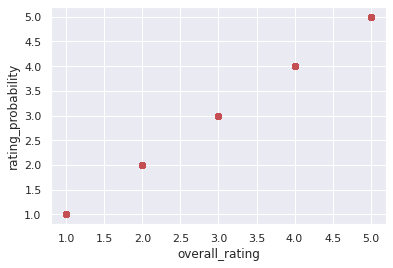

In [34]:
# Cheking ranking with rating probability
plt.plot(df5_num_median['overall_rating'].values, df5_num_median['rating_probability'].values, 'ro') # ro = red circles
plt.xlabel('overall_rating')
plt.ylabel('rating_probability')
plt.show()

# 3- Preparing Data for Model

In [35]:
#seperating dependent and independent variable

X = df5_num_median.drop(["rating_probability","overall_rating","ratings_average","ratings_count", 'longitude',"latitude","distance_to_center"], axis=1)
y = df5_num_median.overall_rating

In [36]:
X.head()

,hotel_id,city_id,hotel_type,basename,impression_level,interaction_level,wifi_lobby,wifi_room
0,11511119,31497,Hotel,Xi Hu,1,1,1.0,1.0
1,11577919,14121,Hotel,Colors Urban Thessaloniki,1,1,1.0,1.0
2,11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,1,2,1.0,1.0
3,11814291,14121,Hotel,Elia City,1,1,1.0,1.0
4,11938295,31497,Home / Apartment,Le Petit Rosedale Hong Kong,1,1,1.0,1.0


In [37]:
# Creating Dummy variables of non_numeric data
X = pd.get_dummies(X, drop_first=True)

In [38]:
X.shape

(400, 411)

In [39]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=10)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 411)
(100, 411)
(300,)
(100,)


# 4- Model Implementation

In [41]:
def get_ensemble_models():
    rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingClassifier(n_estimators=51,random_state=42)
    extra = ExtraTreesClassifier(n_estimators=51,random_state=42)
    ada = AdaBoostClassifier(n_estimators=51,random_state=42)
    grad = GradientBoostingClassifier(n_estimators=51,random_state=42)
    clf = DecisionTreeClassifier(criterion='gini', splitter='best')
    svc = SVC(kernel='rbf', C=1).fit(X_train, y_train)
    log_regressor = LogisticRegression(random_state=10)
    log_regressor.fit(X_train, y_train)
    classifier_list = [rf,bagg,extra,ada,grad,clf,svc,log_regressor]
    classifier_name_list = ['Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost','Decision Tree','SVM','Logistic regression']
    return classifier_list,classifier_name_list
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")
    
classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

--------- Model :  Random Forests  ---------------

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00        11
         3.0       0.43      1.00      0.60        43
         4.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00        17

    accuracy                           0.43       100
   macro avg       0.09      0.20      0.12       100
weighted avg       0.18      0.43      0.26       100

Accuracy Score :  0.43
---------------------------------------

--------- Model :  Bagging  ---------------

              precision    recall  f1-score   support

         1.0       0.25      0.20      0.22        10
         2.0       0.10      0.09      0.10        11
         3.0       0.42      0.42      0.42        43
         4.0       0.21      0.32      0.26        19
         5.0       0.09      0.06      0.07        17

    accuracy            

In [44]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


def print_confusion_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Confusion Metrics : ', trained_model_name, ' ---------------\n')
    confusion = confusion_matrix(y_test, y_pred)
    print(confusion)
    print("---------------------------------------\n")
    
classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    print_confusion_metrics(classifier,classifier_name,X_test,y_test)

Confusion Matrix

[[ 2  2  4  1  1]
 [ 2  1  5  2  1]
 [ 3  4 18 13  5]
 [ 0  2  8  6  3]
 [ 1  1  8  6  1]]
--------- Confusion Metrics :  Random Forests  ---------------

[[ 2  2  4  1  1]
 [ 2  1  5  2  1]
 [ 3  4 18 13  5]
 [ 0  2  8  6  3]
 [ 1  1  8  6  1]]
---------------------------------------

--------- Confusion Metrics :  Bagging  ---------------

[[ 2  2  4  1  1]
 [ 2  1  5  2  1]
 [ 3  4 18 13  5]
 [ 0  2  8  6  3]
 [ 1  1  8  6  1]]
---------------------------------------

--------- Confusion Metrics :  Extra Trees  ---------------

[[ 2  2  4  1  1]
 [ 2  1  5  2  1]
 [ 3  4 18 13  5]
 [ 0  2  8  6  3]
 [ 1  1  8  6  1]]
---------------------------------------

--------- Confusion Metrics :  AdaBoost  ---------------

[[ 2  2  4  1  1]
 [ 2  1  5  2  1]
 [ 3  4 18 13  5]
 [ 0  2  8  6  3]
 [ 1  1  8  6  1]]
---------------------------------------

--------- Confusion Metrics :  Gradient Boost  ---------------

[[ 2  2  4  1  1]
 [ 2  1  5  2  1]
 [ 3  4 18 13  5]
 [ 0 

### Implementing Feed-Forward Neural Network

In [45]:
from sklearn.neural_network import MLPClassifier
def get_neural_network(hidden_layer_size=50):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size)
    return [mlp], ['MultiLayer Perceptron']
    
classifier_list, classifier_name_list = get_neural_network()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

--------- Model :  MultiLayer Perceptron  ---------------

              precision    recall  f1-score   support

         1.0       0.20      0.50      0.29        10
         2.0       0.00      0.00      0.00        11
         3.0       0.46      0.58      0.52        43
         4.0       0.00      0.00      0.00        19
         5.0       0.19      0.24      0.21        17

    accuracy                           0.34       100
   macro avg       0.17      0.26      0.20       100
weighted avg       0.25      0.34      0.29       100

Accuracy Score :  0.34
---------------------------------------



# 5- Optimal Model

based on performance i.e classification report scores, Bagging model looks the most consistent.

In [49]:
model_val =  BaggingClassifier(n_estimators=51,random_state=42)
model_val.fit(X_train, y_train)
y_pred = model_val.predict(X_test)

In [51]:
df_submit=X_test[["hotel_id","city_id"]]
df_submit["score"]=y_pred

In [52]:
df_submit.head(2)

,hotel_id,city_id,score
332,298283,14257,5.0
111,2609635,14121,2.0


In [53]:
 df_submit.to_csv('submit.csv')